## 0. Working with national test data
Skolverket is a school authority in Sweden that has collected lots of data for schools in Sweden. We'll analyze national tests results. Data is found in this repository here.

a) Start with reading in the file riket2023_åk9_np.xlsx and the sheets for the different subjects.

In [131]:
import pandas as pd


national_test_file_path = "data/riket2023_åk9_np.xlsx"
# sheet_names
pd.ExcelFile(national_test_file_path)

sheet_names = pd.ExcelFile(national_test_file_path).sheet_names

#iterate through sheet names
# read each sheet into a dictionary of dataframes

df_dict = {}
for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
    )

df_dict.keys()

df_dict["Matematik"]







,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [132]:
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

##  b) Change the column names

In [133]:
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [134]:
import numpy as np

postfixes = [""]*2 + [" (A-F)"]*3 + [" (A-E)"]*3 + [" (poäng)"]*3




In [135]:
df_dict["Engelska"].columns.str.strip() + np.array(postfixes)

Index(['Riket', 'Typ av huvudman', 'Totalt (A-F)', 'Flickor (A-F)',
       'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)',
       'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [144]:
from copy import deepcopy
df_dict_cleaned = deepcopy(df_dict)
for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename({"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1)

df_dict_cleaned["Svenska"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


In [146]:
df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


## c) EDA

In [149]:
df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [148]:
df_dict_cleaned["Matematik"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plats            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      object 
 6   Flickor (A-E)    4 non-null      object 
 7   Pojkar (A-E)     4 non-null      object 
 8   Totalt (poäng)   4 non-null      float64
 9   Flickor (poäng)  4 non-null      float64
 10  Pojkar (poäng)   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [150]:
df_dict_cleaned["Matematik"]["Totalt (A-F)"]

0    106766
1     84163
2     22553
3        50
Name: Totalt (A-F), dtype: int64

In [151]:
df_dict_cleaned["Matematik"].columns

Index(['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)',
       'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)',
       'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [153]:
df_dict_cleaned["Matematik"].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt (poäng),4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor (poäng),4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar (poäng),4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


In [155]:
df_dict_cleaned["Matematik"][["Huvudman", "Totalt (poäng)"]]

,Huvudman,Totalt (poäng)
0,Samtliga,11.9
1,Kommunal,11.6
2,Enskild,13.0
3,Skolverket,14.1


## d) amount of students that got F in math

In [157]:
df_math = df_dict_cleaned["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [166]:
import duckdb

total_students = duckdb.query(
    """SELECT "Totalt (A-F)" 
       FROM df_math 
       WHERE huvudman = 'Samtliga'"""
).df().values[0][0]

total_students

np.int64(106766)

In [161]:
students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01*total_students
students_passed

0    95128.506
Name: Totalt (A-E), dtype: object

In [164]:
students_failed = total_students - students_passed
students_failed[0]

11637.493999999992

## e) Bar chart on total points for each subject

In [171]:
total_points = {}
# {
# Engelska : ..., Matte: ..., Svenska: ...
# }

# matplotlib bar plot, x = keys, height = points


df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]

np.float64(15.7)

In [173]:
for subject in subjects:
    total_points[subject] = df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")[
        "Totalt (poäng)"
    ][0]

total_points

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(11.9),
 'Svenska': np.float64(13.6),
 'Svenska som andraspråk': 9.4}

['Engelska', 'Matematik', 'Svenska', 'SvA']


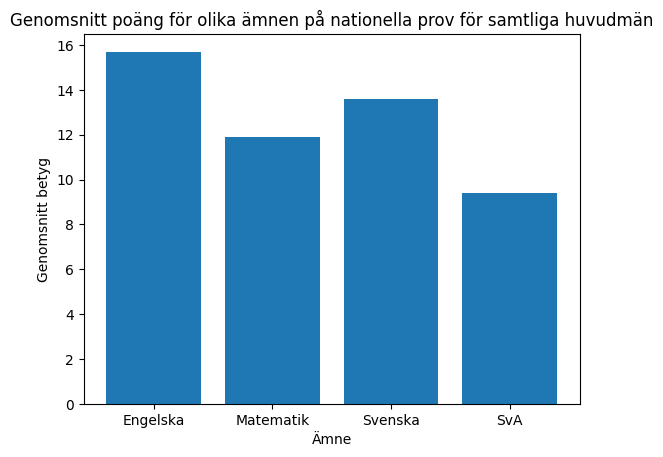

In [175]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)

ax.bar(x=total_points.keys(), height=total_points.values())
ax.set(
    xlabel="Ämne",
    ylabel="Genomsnitt betyg",
    title="Genomsnitt poäng för olika ämnen på nationella prov för samtliga huvudmän",
)

subjects[-1] = "SvA"
print(subjects)
ax.set_xticks(labels=subjects, ticks=range(len(subjects)))

In [193]:
from datetime import datetime
from datetime import time
nu = datetime.now(tz = None)
nu_ = time.time()

AttributeError: type object 'datetime.time' has no attribute 'time'